# Laboratory 3 - Introduction to Numerical Methods for Data Science

## Week 3 - Numerical Differentiation

The goal of this laboratory is to learn about numerical differentiation and practical implementations of numerical gradients.

You will learn about:

- Analytical vs Numerical Gradient
- Gradient for Arrays/Tensors and Callables
- Autodifferentiation

After completing the laboratory you should understand what problems are connected with numerical differentiation and how to perform it effectively.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch as tc

from typing import Callable, Iterable

### Task 1 - Numerical Derivative - Arrays

Implement function called `derivative` that calculates the numerical derivative of one dimensional array using one of selected modes from "forward", "central", and "backward". Use the equations derived during the Lecture. Remember about boundary conditions (the first value and last value should be always differentiated in forward/backward mode respectively).

In [2]:
def derivative(array: np.ndarray, mode: str) -> np.ndarray:
    n = len(array)
    derivative_array = np.zeros_like(array)

    h = 1
    #h = h.astype(np.float32)

    if mode == "forward":
        derivative_array[0] = (array[1] - array[0]) / h
        for i in range(1, n-1):
            derivative_array[i] = (array[i+1] - array[i]) / h
        derivative_array[n-1] = (array[n-1] - array[n-2]) / h

    if mode == "backward":
        derivative_array[0] = (array[1] - array[0]) / h
        for i in range(1, n-1):
            derivative_array[i] = (array[i] - array[i-1]) / h
        derivative_array[n-1] = (array[n-1] - array[n-2]) / h

    if mode == "central":
        derivative_array[0] = (array[1] - array[0]) / h
        for i in range(1, n-1):
            derivative_array[i] = (array[i+1] - array[i-1]) / (2*h)
        derivative_array[n-1] = (array[n-1] - array[n-2]) / h


    return derivative_array

In [3]:
array = np.random.randn(100)
np_derivative = np.gradient(array)
forward_derivative = derivative(array, "forward")
central_derivative = derivative(array, "central")
backward_derivative = derivative(array, "backward")
print(f"Forward error: {np.mean(np.abs(np_derivative - forward_derivative))}")
print(f"Central error: {np.mean(np.abs(np_derivative - central_derivative))}")
print(f"Backward error: {np.mean(np.abs(np_derivative - backward_derivative))}")

Forward error: 1.0605300178106871
Central error: 0.0
Backward error: 1.060530017810687


Test your implementation:

In [ ]:
array = np.random.randn(100)
np_derivative = np.gradient(array)
forward_derivative = derivative(array, "forward")
central_derivative = derivative(array, "central")
backward_derivative = derivative(array, "backward")
print(f"Forward error: {np.mean(np.abs(np_derivative - forward_derivative))}")
print(f"Central error: {np.mean(np.abs(np_derivative - central_derivative))}")
print(f"Backward error: {np.mean(np.abs(np_derivative - backward_derivative))}")

Forward error: 0.972859286480587
Central error: 0.0
Backward error: 0.9728592864805872


### Task 2 - Derivative Errors - Arrays

Generate a uniform range of 50 values between -3 and 3. Then, using this array generate a function $f(x) = x^2 - x + 5$ and analytically calculate the associated derivative.

Then, use the `derivative` function implemented in Task 1 to numerically approximate the derivative. Remember about the real differentiation step when calculating the derivative. Calculate the absolute error between the real derivative and the approximated one using all three modes. You should observe that the centrial differences result in significantly lower error.

In [4]:
array = np.linspace(-3, 3, 50)
array = array.astype(np.float32)

func = lambda x: x**2 - x + 5
d_func = lambda x: 2*x - 1
df_exact = d_func(array)

real_h = array[1] - array[0]

df_forward = derivative(func(array), "forward")
df_central = derivative(func(array), "central")
df_backward = derivative(func(array), "backward")

error_forward = np.mean(df_forward - df_exact)
error_central = np.mean(df_central - df_exact)
error_backward = np.mean(df_backward - df_exact)

print(error_forward)
print(error_central)
print(error_backward)


0.89194506
0.87755114
0.863157


In [ ]:
# TODO

Forward error: 0.12244897959183772
Central error: 0.0048979591836771945
Backward error: 0.12244897959183502


### Task 3 - Numerical Derivative - Callable

Repeat Task 1 but this time implement the function (`derivative_callable`) assuming that the input is not the `np.ndarray` but a `Callable` - so a function that can be called explicitly to calculate the derivative. This time the function should take an additional parameter: `step`. The function should return another function that can be used to calculate derivatives for a given argument.

In [5]:
def derivative_callable(func : Callable, step : float, mode : str) -> Callable:
    if mode == "forward":
        return lambda x: (func(x + step) - func(x)) / step
    if mode == "backward":
        return lambda x: (func(x) - func(x - step)) / step
    if mode == "central":
        return lambda x: (func(x + step) - func(x - step)) / (2*step)

In [6]:
func = lambda x: x**3 - x**2 + 2*x + 3
d_func = lambda x: 3*x**2 - 2*x + 2

d_forward = derivative_callable(func, 1e-6, "forward")
d_central = derivative_callable(func, 1e-6, "central")
d_backward = derivative_callable(func, 1e-6, "backward")

value = 7.2
print(f"Function at value: {value}")
print(f"Analytical derivative: {d_func(value)}, Forward derivative: {d_forward(value)}, Central derivative: {d_central(value)}, Backward derivative: {d_backward(value)}")
print(f"Absolute Forward Error: {np.abs(d_func(value) - d_forward(value))}")
print(f"Absolute Central Error: {np.abs(d_func(value) - d_central(value))}")
print(f"Absolute Bakcward Error: {np.abs(d_func(value) - d_backward(value))}")

print()

value = -22.1
print(f"Function at value: {value}")
print(f"Analytical derivative: {d_func(value)}, Forward derivative: {d_forward(value)}, Central derivative: {d_central(value)}, Backward derivative: {d_backward(value)}")
print(f"Absolute Forward Error: {np.abs(d_func(value) - d_forward(value))}")
print(f"Absolute Central Error: {np.abs(d_func(value) - d_central(value))}")
print(f"Absolute Bakcward Error: {np.abs(d_func(value) - d_backward(value))}")

print()

value = np.linspace(-3, 3, 10)
print(f"Function at value: {value}")
print(f"Mean Absolute Forward Error: {np.mean(np.abs(d_func(value) - d_forward(value)))}")
print(f"Mean Absolute Central Error: {np.mean(np.abs(d_func(value) - d_central(value)))}")
print(f"Mean Absolute Backward Error: {np.mean(np.abs(d_func(value) - d_backward(value)))}")

Function at value: 7.2
Analytical derivative: 143.12, Forward derivative: 143.12002065253182, Central derivative: 143.12000001837077, Backward derivative: 143.11997938420973
Absolute Forward Error: 2.0652531816267583e-05
Absolute Central Error: 1.8370769794273656e-08
Absolute Bakcward Error: 2.0615790276679036e-05

Function at value: -22.1
Analytical derivative: 1511.4300000000003, Forward derivative: 1511.4299349079374, Central derivative: 1511.4300013010507, Backward derivative: 1511.4300676941639
Absolute Forward Error: 6.509206286864355e-05
Absolute Central Error: 1.3010503607802093e-06
Absolute Bakcward Error: 6.769416359020397e-05

Function at value: [-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333
  1.          1.66666667  2.33333333  3.        ]
Mean Absolute Forward Error: 4.999798758253959e-06
Mean Absolute Central Error: 1.9839811127297934e-09
Mean Absolute Backward Error: 5.000155476464485e-06


Test your implementation:

In [ ]:
func = lambda x: x**3 - x**2 + 2*x + 3
d_func = lambda x: 3*x**2 - 2*x + 2

d_forward = derivative_callable(func, 1e-6, "forward")
d_central = derivative_callable(func, 1e-6, "central")
d_backward = derivative_callable(func, 1e-6, "backward")

value = 7.2
print(f"Function at value: {value}")
print(f"Analytical derivative: {d_func(value)}, Forward derivative: {d_forward(value)}, Central derivative: {d_central(value)}, Backward derivative: {d_backward(value)}")
print(f"Absolute Forward Error: {np.abs(d_func(value) - d_forward(value))}")
print(f"Absolute Central Error: {np.abs(d_func(value) - d_central(value))}")
print(f"Absolute Bakcward Error: {np.abs(d_func(value) - d_backward(value))}")

print()

value = -22.1
print(f"Function at value: {value}")
print(f"Analytical derivative: {d_func(value)}, Forward derivative: {d_forward(value)}, Central derivative: {d_central(value)}, Backward derivative: {d_backward(value)}")
print(f"Absolute Forward Error: {np.abs(d_func(value) - d_forward(value))}")
print(f"Absolute Central Error: {np.abs(d_func(value) - d_central(value))}")
print(f"Absolute Bakcward Error: {np.abs(d_func(value) - d_backward(value))}")

print()

value = np.linspace(-3, 3, 10)
print(f"Function at value: {value}")
print(f"Mean Absolute Forward Error: {np.mean(np.abs(d_func(value) - d_forward(value)))}")
print(f"Mean Absolute Central Error: {np.mean(np.abs(d_func(value) - d_central(value)))}")
print(f"Mean Absolute Backward Error: {np.mean(np.abs(d_func(value) - d_backward(value)))}")

Function at value: 7.2
Analytical derivative: 143.12, Forward derivative: 143.12002065253182, Central derivative: 143.12000001837077, Backward derivative: 143.11997938420973
Absolute Forward Error: 2.0652531816267583e-05
Absolute Central Error: 1.8370769794273656e-08
Absolute Bakcward Error: 2.0615790276679036e-05

Function at value: -22.1
Analytical derivative: 1511.4300000000003, Forward derivative: 1511.4299349079374, Central derivative: 1511.4300013010507, Backward derivative: 1511.4300676941639
Absolute Forward Error: 6.509206286864355e-05
Absolute Central Error: 1.3010503607802093e-06
Absolute Bakcward Error: 6.769416359020397e-05

Function at value: [-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333
  1.          1.66666667  2.33333333  3.        ]
Mean Absolute Forward Error: 4.999798758253959e-06
Mean Absolute Central Error: 1.9839811127297934e-09
Mean Absolute Backward Error: 5.000155476464485e-06


The accuracy of the derivative calculation using Callables instead of arrays seems to be much more accurate. What is the reason to use the version based on arrays then?

### Task 4 - Derivative Errors - Callables

Use the function implemented in Task 3 to benchmark the absolute error with respect to the step size (logarithm scale from $10^{-1}$ to $10^{-12}$) for each derivative approximation method (forward, central, backward).

Use the function $f(x) = cos(x)$ in range of 100 values from $-\pi$ to $\pi$ and calculate the error as the mean absolute error between the real derivative and the numerical one. Show the error with respect to the step size using matplotlib plot (remember about logscales).

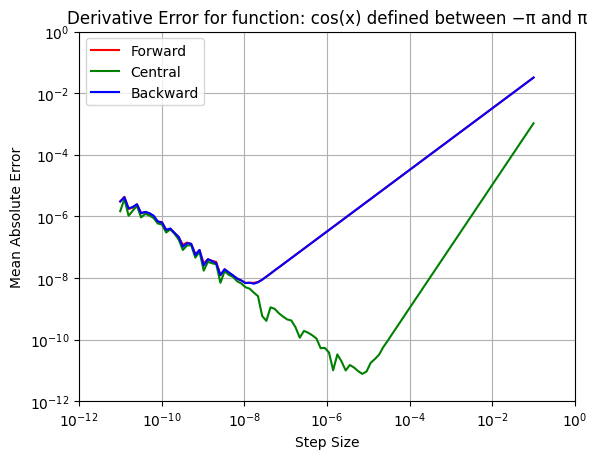

In [25]:
import math

func = lambda x: np.cos(x)
disc_func = np.linspace(-math.pi, math.pi, 100)
exact_func = lambda x: -np.sin(x)

step_sizes = np.logspace(-11, -1, 100)

# Error Storage
error_forward = []
error_central = []
error_backward = []

for step in step_sizes:
    forward_approx = derivative_callable(func, step, "forward")(disc_func)
    central_approx = derivative_callable(func, step, "central")(disc_func)
    backward_approx = derivative_callable(func, step, "backward")(disc_func)

    exact_values = exact_func(disc_func)

    error_forward.append(np.mean(np.abs(exact_values - forward_approx)))
    error_central.append(np.mean(np.abs(exact_values - central_approx)))
    error_backward.append(np.mean(np.abs(exact_values - backward_approx)))

plt.figure()
plt.plot(step_sizes, error_forward, 'r', label="Forward")
plt.plot(step_sizes, error_central, 'g', label="Central")
plt.plot(step_sizes, error_backward, 'b', label="Backward")

plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-12, 1)
plt.ylim(1e-12, 1)
plt.xlabel("Step Size")
plt.ylabel("Mean Absolute Error")
plt.title("Derivative Error for function: cos(x) defined between −π and π")
plt.legend()
plt.grid(True)
plt.show()

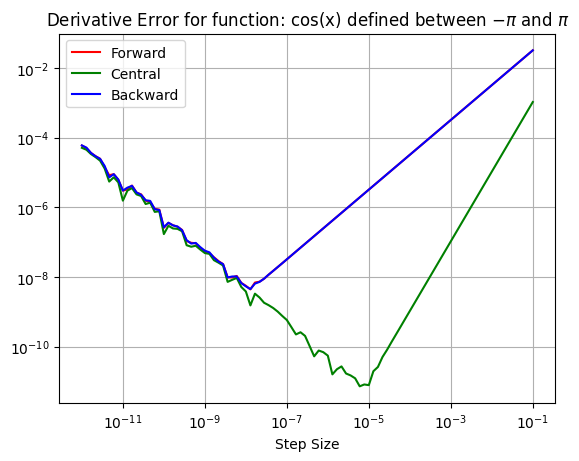

In [ ]:
# leave this line empty!

You can observe the trade-off between round-off and truncation errors discussed during the previous lecture.

### Task 5 - Multidimensional Gradient

Expand the function from Task 1 to implement function called `gradient` that calculates the numerical derivative for arrays with any desired number of dimensions. Implement only the central differences, however, remember about handling the boundary conditions.

In [ ]:
def gradient(array : np.ndarray) -> Iterable[np.ndarray]:
    pass # TODO

Compare your implementation to the `np.gradient` implementation.

In [ ]:
array = np.random.randn(100, 100)
gradient_np = np.array(np.gradient(array))
gradient_own = np.array(gradient(array))
print(f"Absolute error 2-D: {np.mean(np.abs(gradient_own - gradient_np))}")

array = np.random.randn(30, 30, 30)
gradient_np = np.array(np.gradient(array))
gradient_own = np.array(gradient(array))
print(f"Absolute error 3-D: {np.mean(np.abs(gradient_own - gradient_np))}")

array = np.random.randn(5, 3, 9, 4, 7, 3, 4)
gradient_np = np.array(np.gradient(array))
gradient_own = np.array(gradient(array))
print(f"Absolute error 7-D: {np.mean(np.abs(gradient_own - gradient_np))}")

Absolute error 2-D: 0.0
Absolute error 3-D: 0.0
Absolute error 7-D: 0.0


### Task 6 - Automatic Differentiation

Use `PyTorch` to implement automatic differentiation for the following functions:

* $f(x) = x^2 - x + 5$ between $-3$ and $3$
* $f(x) = sin(x)$ between $-\pi$ and $\pi$
* $f(x) = log(x)$ between $1$ and $20$

You can use `.grad` or `.backward` functions - as you prefer. Calculate the error between the automatic and the analytical differentiation and between the automatic and numerical differentiation (Callable version, step = $1e^{-8}$). Show the results.

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

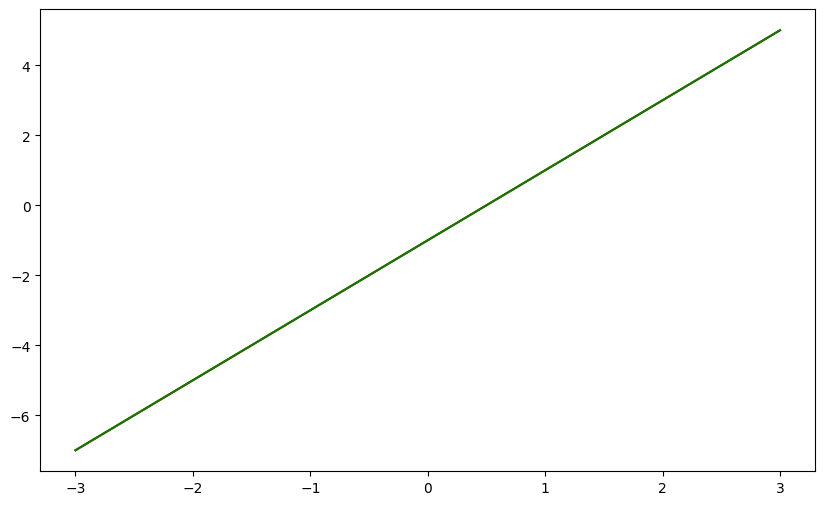

In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

# Define functions
quadratic = lambda x: x**2 - x + 5
sinus = lambda x: torch.sin(x)
logarithmic = lambda x: torch.log(x)

d_quadratic = lambda x: 2*x - 1
d_sinus = lambda x: torch.cos(x)
d_logarithmic = lambda x: 1/x

def numerical_derivative(func, x, step=1e-8):
    return (func(x + step) - func(x - step)) / (2 * step)

# Generate input values
x_q = torch.linspace(-3, 3, 100, requires_grad=True)
x_s = torch.linspace(-np.pi, np.pi, 100, requires_grad=True)
x_l = torch.linspace(1, 20, 100, requires_grad=True)

# Compute function values
y_q = quadratic(x_q)
y_s = sinus(x_s)
y_l = logarithmic(x_l)

# Compute automatic differentiation
y_q.sum().backward()
y_s.sum().backward()
y_l.sum().backward()

auto_d_q = x_q.grad.clone()
auto_d_s = x_s.grad.clone()
auto_d_l = x_l.grad.clone()

# Compute analytical derivatives
ana_d_q = d_quadratic(x_q)
ana_d_s = d_sinus(x_s)
ana_d_l = d_logarithmic(x_l)

# Compute numerical derivatives
num_d_q = np.array([numerical_derivative(quadratic, x.item()) for x in x_q])
num_d_s = np.array([numerical_derivative(lambda x: np.sin(x), x.item()) for x in x_s])
num_d_l = np.array([numerical_derivative(lambda x: np.log(x), x.item()) for x in x_l])

# Compute errors
error_auto_ana_q = torch.abs(auto_d_q - ana_d_q)
error_auto_num_q = torch.abs(auto_d_q - torch.tensor(num_d_q))

error_auto_ana_s = torch.abs(auto_d_s - ana_d_s)
error_auto_num_s = torch.abs(auto_d_s - torch.tensor(num_d_s))

error_auto_ana_l = torch.abs(auto_d_l - ana_d_l)
error_auto_num_l = torch.abs(auto_d_l - torch.tensor(num_d_l))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_q.detach(), auto_d_q, 'r', label="Automatic")
plt.plot(x_q.detach(), num_d_q, 'g', label="Numerical")
plt.plot(x_q.detach(), ana_d_q, 'b', label="Analytical")
plt.xlabel("x")
plt.ylabel("Derivative")
plt.title("Derivative of f(x) = x^2 - x + 5")
plt.legend()
plt.grid(True)
plt.show()

# Display errors
print("Quadratic function errors:")
print("Error between automatic and analytical:", error_auto_ana_q.mean().item())
print("Error between automatic and numerical:", error_auto_num_q.mean().item())


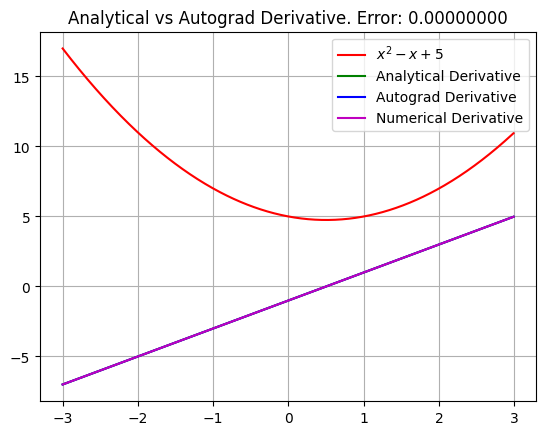

Mean Absolute Error (Automatic): 0.0
Mean Absolute Error (Numerical): 1.505638103083129e-08


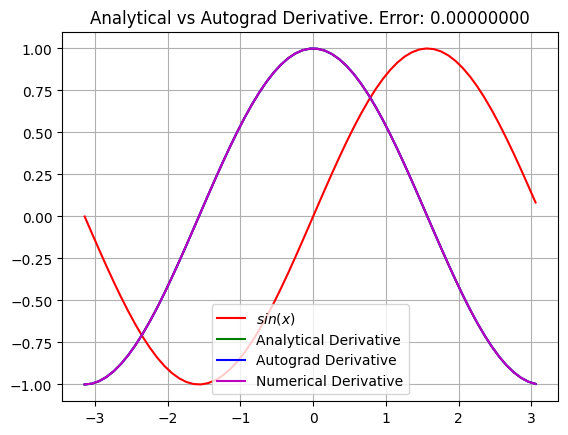

Mean Absolute Error (Automatic): 0.0
Mean Absolute Error (Numerical): 1.115208845904801e-08


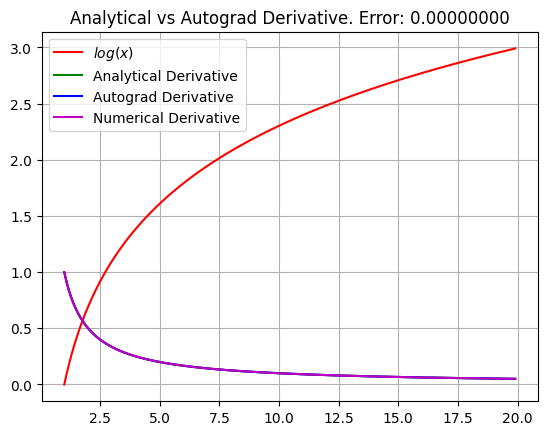

Mean Absolute Error (Automatic): 0.0
Mean Absolute Error (Numerical): 8.075456476618863e-09


In [ ]:
#TODO